# Homework #4

## Regularization in Machine Learning

This colaboratory contains Homework #4 of the Machine Learning course, which is due **October 30, midnight (23:59 EEST time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.


## Submission's rules:

1.   Please, submit only .ipynb that you extract from the Colaboratory.
2. Run your homework exercises before submitting (output should be present, preferably restart the kernel and press run all the cells).
3. Do not change the description of tasks in red (even if there is a typo|mistake|etc).
4. Please, make sure to avoid unnecessary long printouts.
5. Each task should be solved right under the question of the task and not elsewhere.
6. Solutions to both regular and bonus exercises should be submitted in one IPYNB file.

Please, steer clear of copying someone else's work. If you discuss assignments with anyone in the course, please, mention their names here:
1. Pooh

##List of Homework's exercises:

1.   [Ex1](#scrollTo=gCUvnKxZXTul) - 3 points
2.   [Ex2](#scrollTo=yLmunCZ9k-G6) - 4 points
3.   [Ex3](#scrollTo=lPdnuVSqeIN2) - 3 points
4.   [Bonus 1](#scrollTo=piaKpOh8If7h) - 2 points
5.   [Bonus 2](#scrollTo=jdZkblZW7bEp) - up to 4 points (based on quality of presentation)


In [1]:
!pip install -q plotnine
from plotnine import *

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

import matplotlib.pyplot as plt

# loading in the cifar10 dataset
from keras.datasets import cifar10
from keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout
from keras import regularizers, optimizers, Sequential

In [2]:
# Auxiliary functions
def plot_curves(history):
  plt.figure(figsize=(16, 6))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Training', 'Validation'])
  plt.title('Loss')

  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Training', 'Validation'])
  plt.title('Accuracy')

def define_model(lambda_):
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_), input_shape=(32, 32, 3)))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_)))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_)))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  
  model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(lambda_)))

  model.add(Dense(10, activation='softmax'))
  return(model)

def define_model_dropout(dropout_rate = 0):
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3)))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(dropout_rate))

  model.add(Conv2D(64, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(dropout_rate))

  model.add(Conv2D(128, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(dropout_rate))

  model.add(Flatten())
  
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(dropout_rate))

  model.add(Dense(10, activation='softmax'))
  return(model)

## Homework exercise 1 (3 points): ElasticNet algorithm combines both Ridge and LASSO regression.
<font color='red'> In the class we discussed Ridge and Lasso regression algorithms, which are basically, L2 and L1 regularisations applied to Linear Regression model. ElasticNet is a method that combines both L2 and L1 regularisations under one model. ElasticNet adds both L2 and L1 norms to the error function. Here you should train and visualise ElasticNet model on the toy dataset. </font>


In [3]:
# Let's regenerate training data one more time
example_data = pd.DataFrame({'x':[1,2,3,4,5], 'y':[2,4,5,4,5]})
example_data['x^2'] = example_data.x**2
example_data['x^3'] = example_data.x**3
example_data['x^4'] = example_data.x**4

visualisation_data = pd.DataFrame({'x': np.linspace(start=0, stop=6, num=61),
                          'x^2': np.linspace(start=0, stop=6, num=61)**2,
                          'x^3': np.linspace(start=0, stop=6, num=61)**3,
                          'x^4': np.linspace(start=0, stop=6, num=61)**4})

<font color='red'> **(Homework exercise 1- a)** Train ElasticNet as well as three other regression models (linear, ridge and lasso) using `sklearn` on example data. **(1 point)**. </font>

In [4]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Regularization strength
lambda_ = 1

##### YOUR CODE STARTS #####
# first initialise different regressions
lr = LinearRegression()
lr_ridge = Ridge(lambda_) 
lr_lasso  = Lasso(lambda_)
lr_elasticnet = ElasticNet(lambda_)
# then fit them to our example_data
lr.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_lasso.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_elasticnet.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
# finally predict the visualisation data
visualisation_data['lr_y'] = lr.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
visualisation_data['lr_ridge_y'] = lr_ridge.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
visualisation_data['lr_lass_y'] = lr_lasso.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
visualisation_data['lr_elasticnet_y'] = lr_elasticnet.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
##### YOUR CODE ENDS ##### 

<font color='red'> **(Homework exercise 1- b)** Visualise all four regression trends (baseline, LASSO, Ridge and ElasticNet) on the same figure. Highlight ElasticNet in <font color='#F1C40F'>yellow</font>, while others in black (linear), red (ridge) and blue (lasso). **(1 point)**. </font>


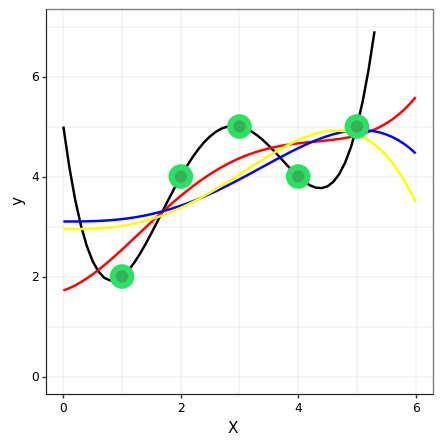

<ggplot: (8749253675125)>

In [5]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
       ##### YOUR CODE STARTS #####
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_y'), size = 1, colour = 'black') +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_ridge_y'), size = 1, colour = 'red') +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_lass_y'), size = 1, colour = 'blue') +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_elasticnet_y'), size = 1, colour = 'yellow') +
       ##### YOUR CODE ENDS ##### 
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black')) + 
    guides(size = False)
)
fig


<font color='red'> **(Homework exercise 1- c)** Print out ElasticNet coefficients and intercept, compare it to coefficients and intercept of other regressions. Which one ElasticNet seems to be more similar to? Which parameter in `sklearn.ElasticNet` function is responsible for mixing of L1 and L2 regularisation? **(1 point)**. </font>

In [6]:
##### YOUR CODE STARTS #####
print('\t\t\t\t\t  x           x^2         x^3         x^4')
print(f'Linear regression coefficients are:     {lr.coef_}')
print(f'Lasso regression coefficients are:     {lr_lasso.coef_}')
print(f'Ridge regression coefficients are:      {lr_ridge.coef_}')
print(f'ElasticNet regression coefficients are: {lr_elasticnet.coef_}')
##### YOUR CODE ENDS ##### 

					  x           x^2         x^3         x^4
Linear regression coefficients are:     [[-8.75        7.79166667 -2.25        0.20833333]]
Lasso regression coefficients are:     [ 0.          0.          0.05608653 -0.00829621]
Ridge regression coefficients are:      [[ 0.3882215   0.61877466 -0.20687874  0.0184773 ]]
ElasticNet regression coefficients are: [ 0.          0.          0.07844547 -0.01265445]


<font color='red'> Your textual answer goes here: </font>

<font color="blue"> ElasticNet is most similar to Lasoo regression. Both x and x^2 coefficients are 0. Both x^4 coefficient is closer as well and x^3 coefficient is fairly close as well.

Parameter l1_ratio mixes L1 and L2 regularisation. </font>

## Homework exercise 2 (4 points): searching for good dropout rate
<font color='red'> Use `sklearn` function (`KFold`) for cross-validation to find the best possible dropout rate for the neural network we used in the class (that you call via `define_model_dropout`). </font>

In [7]:
# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:25000]
y_train = y_train[:25000]

# Normalising values
mu = X_train.mean(axis=(0,1,2)) # finds mean of R, G and B separately
std = X_train.std(axis=(0,1,2)) # same for std
X_train_norm = (X_train - mu)/std
X_test_norm = (X_test - mu)/std

<font color='red'> **(Homework exercise 2- a)** Run cross-validation by filling in the gaps and collect validation accuracy scores for each dropout rate. **(2 points)**. </font>


In [8]:
from sklearn.model_selection import KFold
dropout_rates = [0.0, 0.1, 0.25, 0.5, 0.99] # feel free to choose other values to loop over

# you can collect both accuracy and loss if you like, 
# but loss is influenced by the regularisation itself, so maybe less informative
val_fold_acc = np.zeros(len(dropout_rates))
val_fold_loss = np.zeros(len(dropout_rates))

for i, dropout_rate in enumerate(dropout_rates):
  print(f'Validation loss for dropout rate = {dropout_rate}...')
  ##### YOUR CODE STARTS #####
  # 4-fold cross validation
  # Here we are using sklearn Cross Validation Function called KFold
  kf = KFold(n_splits=4, shuffle=True, random_state=111)

  # Do not change these lines, we initialize empty lists
  fold_acc = []
  fold_loss = []
  for train_index, val_index in kf.split(X_train_norm):

    # split data into train_X, train_y and val_X, val_y depending on the fold:
    train_X = X_train_norm[train_index]
    train_y = y_train[train_index]
    val_X = X_train_norm[val_index]
    val_y = y_train[val_index]

    # train the neural network with dropout_rate
    model = define_model_dropout(dropout_rate)

    # compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    # fit the neural network on training data
    # number of epochs is tricky, if you choose too little the performance will be unstable
    # if you choose too large, it will take ages to complete...
    history = model.fit(train_X, train_y, batch_size=64, epochs=20, validation_split=0.2, verbose=0)

    # calculate accuracy for this fold and store it in fold_acc
    val_loss, val_accuracy = model.evaluate(val_X, val_y)

    # and loss in fold_loss
    fold_acc.append(val_accuracy)
    fold_loss.append(val_loss)
    #### YOUR CODE ENDS ##### 

  print(f'Average validation accuracy for {dropout_rate} is {np.mean(fold_acc)}')
  val_fold_acc[i] = np.mean(fold_acc)
  val_fold_loss[i] = np.mean(fold_loss)

Validation loss for dropout rate = 0.0...
196/196 [==============================] - 1s 3ms/step - loss: 1.8884 - accuracy: 0.6794
Average validation accuracy for 0.0 is 0.68367999792099
Validation loss for dropout rate = 0.1...
196/196 [==============================] - 1s 4ms/step - loss: 1.3027 - accuracy: 0.7005
Average validation accuracy for 0.1 is 0.7098800092935562
Validation loss for dropout rate = 0.25...
196/196 [==============================] - 1s 3ms/step - loss: 0.8094 - accuracy: 0.7394
Average validation accuracy for 0.25 is 0.733039990067482
Validation loss for dropout rate = 0.5...
196/196 [==============================] - 1s 3ms/step - loss: 0.9217 - accuracy: 0.6637
Average validation accuracy for 0.5 is 0.6636800020933151
Validation loss for dropout rate = 0.99...
196/196 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1005
Average validation accuracy for 0.99 is 0.10027999989688396


<font color='red'> **(Homework exercise 2- b)** Create a plot (using standard matplotlib) that shows validation accuracy and loss for different dropout rates that you have tried, report the best one. **(1 point)**. </font>


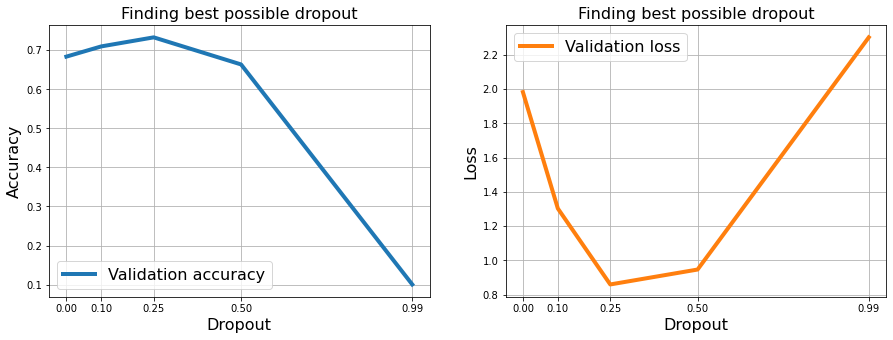

In [9]:
##### YOUR CODE STARTS #####

# Plot for accuracies and loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(dropout_rates, val_fold_acc, label='Validation accuracy', linewidth=4) 
plt.xlabel('Dropout',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Finding best possible dropout',fontsize=16)
plt.legend(fontsize=16)
plt.xticks([0.0, 0.1, 0.25, 0.5, 0.99])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(dropout_rates, val_fold_loss, label='Validation loss', linewidth=4, color="tab:orange") 
plt.xlabel('Dropout',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Finding best possible dropout',fontsize=16)
plt.legend(fontsize=16)
plt.xticks([0.0, 0.1, 0.25, 0.5, 0.99])
plt.grid()
plt.show()
##### YOUR CODE ENDS #####

According to the above graphs, the best dropout rate seems to be 0.25. Best accuracy and lowest loss.

<font color='red'> **(Homework exercise 2- c)** Re-train the network using the dropout rate reported in **(b)**. Visualise performance curves and interpret the results. (if results did not improve, no need to re-run the process again, just comment on the results). **(1 point)**. </font>

In [10]:
##### YOUR CODE STARTS #####
# Define the model with identified dropout rate and compile it
model = define_model_dropout(0.25)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
# Fit the model; return history object
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.2)
##### YOUR CODE ENDS ##### 

Epoch 1/20
313/313 [==============================] - 4s 10ms/step - loss: 1.8074 - accuracy: 0.3297 - val_loss: 1.3803 - val_accuracy: 0.4932
Epoch 2/20
313/313 [==============================] - 3s 9ms/step - loss: 1.3887 - accuracy: 0.4933 - val_loss: 1.1892 - val_accuracy: 0.5584
Epoch 3/20
313/313 [==============================] - 3s 9ms/step - loss: 1.1980 - accuracy: 0.5713 - val_loss: 1.0334 - val_accuracy: 0.6334
Epoch 4/20
313/313 [==============================] - 3s 9ms/step - loss: 1.0572 - accuracy: 0.6198 - val_loss: 0.9782 - val_accuracy: 0.6554
Epoch 5/20
313/313 [==============================] - 3s 9ms/step - loss: 0.9616 - accuracy: 0.6576 - val_loss: 0.8512 - val_accuracy: 0.7002
Epoch 6/20
313/313 [==============================] - 3s 9ms/step - loss: 0.8945 - accuracy: 0.6849 - val_loss: 0.8550 - val_accuracy: 0.6888
Epoch 7/20
313/313 [==============================] - 3s 9ms/step - loss: 0.8118 - accuracy: 0.7129 - val_loss: 0.8208 - val_accuracy: 0.7088
Epoch

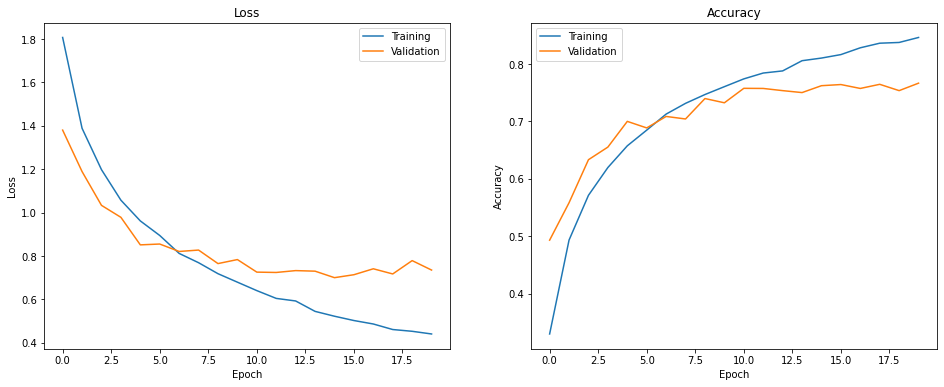

In [11]:
##### YOUR CODE STARTS #####
# plot the progress curves here
plot_curves(history)
##### YOUR CODE ENDS ##### 

In [12]:
##### YOUR CODE STARTS #####
# evaluate the model here
# Loss and accuracy on test set
model.evaluate(X_test_norm, y_test) # Loss and accuracy on test set
##### YOUR CODE ENDS ##### 

313/313 [==============================] - 1s 3ms/step - loss: 0.7761 - accuracy: 0.7553


[0.7760983109474182, 0.755299985408783]

<font color='red'> Your insightful interpretation of the results goes here: </font>

<font color="blue"> The accuracy on test data is about the same as on validation data.</font>

## Homework exercise 3 (3 points): applying more sophisticated augmentation pipelines
<font color='red'> Check https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator and add more interesting transformation into the pipeline we have developed in the class. Train your network again, and interpret the results. First of all some setup. </font>

In [13]:
# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:25000]
y_train = y_train[:25000]


<font color='red'> **(Homework exercise 3- a)** Add at least 2-3 more different transformations described at https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator. Augment CIFAR10 training images. Visualise a few random augmentated images (as we have done for the simple augmentation pipeline in the class). This time, make 5 by 5 grid instead of 3 by 3. Briefly explain your choice of augmentation pipeline (i.e. why these augmentation you added will help?). **(1 point)**. </font>


In [14]:
from keras.preprocessing.image import ImageDataGenerator

##### YOUR CODE STARTS #####
# Create your own data augmentation pipeline:
datagen = ImageDataGenerator(rotation_range=90, # randomly rotate an image from 0 to 90 degrees
                 width_shift_range=0.1,  # horizontally shift an image by a fraction of 0% - 10% (of original width)   
                 height_shift_range=0.1, # vertically shift an image by a fraction of 0% - 10% (of original height)   
                 horizontal_flip=True, # horizontaly flip random 30% of images
                 zoom_range=0.2, # zoom in an image
                 brightness_range=[0.8,1.2], # 1 is neutral, >1 makes image brighter, 1< makes image darker
                 ) 
# assign augmentation pipeline to our data
datagen.fit(X_train)
##### YOUR CODE ENDS #####

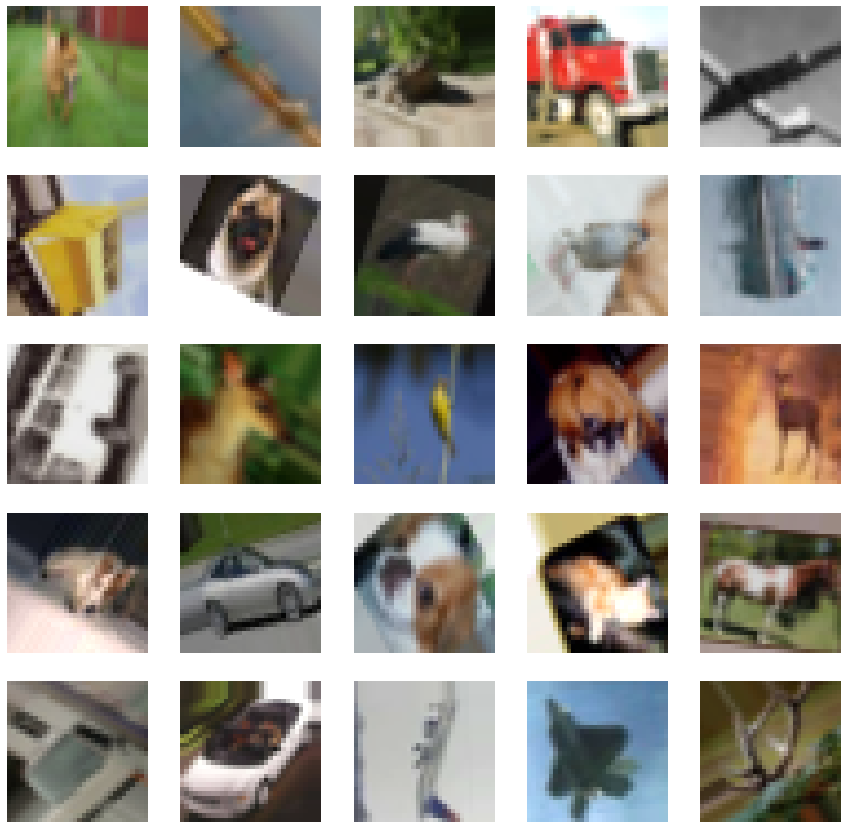

In [15]:
##### YOUR CODE STARTS #####
plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=25):
    # Show 25 images
    for i in range(0, 25):
        plt.subplot(5, 5, 1 + i)
        plt.imshow(X_batch[i].astype('uint8'))
        plt.axis('off')
    # show the plot
    plt.show()
    break
##### YOUR CODE ENDS #####

<font color='red'> **(Homework exercise 3- b)** First, split the training data into train and validation sets using `train_test_split` function from `sklearn` (use 10% for validation). Then normalise each of the three sets (train, val and test) using mean and standard deviations computed on train images (for R, G and B separately). Finally, retrain the model using this new augmented training set. Use non-augmented normalised validation set for validation of the model while training. **(1.5 points)**. </font>

In [16]:
from sklearn.model_selection import train_test_split

##### YOUR CODE STARTS #####
# Split the training data further into train and val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 111, test_size = 0.10)

mu = X_train.mean(axis=(0,1,2)) # finds mean of R, G and B separately
std = X_train.std(axis=(0,1,2)) # same for std
X_train_norm = (X_train - mu)/std
X_val_norm = (X_val - mu)/std
X_test_norm = (X_test - mu)/std
##### YOUR CODE ENDS #####

# Assign augmentation schema to X_train_norm
datagen.fit(X_train_norm)

In [17]:
##### YOUR CODE STARTS #####
from tensorflow.keras.utils import to_categorical
# Create a model
# here you can use either model with dropout or L2 regularisation defined above
model = define_model(.00001)
# Compile the model as before (code is identical)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# remember to use .fit() to train the model
# use batch_size 64 as in the class
history = model.fit(datagen.flow(X_train_norm, to_categorical(y_train), batch_size=64),
                    steps_per_epoch=X_train_norm.shape[0]//64, # number of steps per epochs, needs to be specified as we do augmentation
                    epochs=25,
                    verbose=1,
                    validation_data=(X_val_norm, to_categorical(y_val))
                    )
##### YOUR CODE ENDS ##### 

Epoch 1/25
351/351 [==============================] - 21s 58ms/step - loss: 1.9004 - accuracy: 0.3005 - val_loss: 1.7103 - val_accuracy: 0.3852
Epoch 2/25
351/351 [==============================] - 19s 55ms/step - loss: 1.6621 - accuracy: 0.3976 - val_loss: 1.5283 - val_accuracy: 0.4532
Epoch 3/25
351/351 [==============================] - 19s 55ms/step - loss: 1.5387 - accuracy: 0.4464 - val_loss: 1.5179 - val_accuracy: 0.4508
Epoch 4/25
351/351 [==============================] - 20s 57ms/step - loss: 1.4501 - accuracy: 0.4813 - val_loss: 1.4112 - val_accuracy: 0.4908
Epoch 5/25
351/351 [==============================] - 19s 55ms/step - loss: 1.3822 - accuracy: 0.4998 - val_loss: 1.2725 - val_accuracy: 0.5412
Epoch 6/25
351/351 [==============================] - 19s 55ms/step - loss: 1.3263 - accuracy: 0.5263 - val_loss: 1.3458 - val_accuracy: 0.5168
Epoch 7/25
351/351 [==============================] - 19s 55ms/step - loss: 1.2851 - accuracy: 0.5440 - val_loss: 1.1978 - val_accuracy:


<font color='red'> **(Homework exercise 3- c)** Plot the performance curves (loss and accuracy), evaluate your model on the non-augmented normalised test set and interpret the results. Did the performance improve? Why? Why not? **(0.5 points)**. </font>

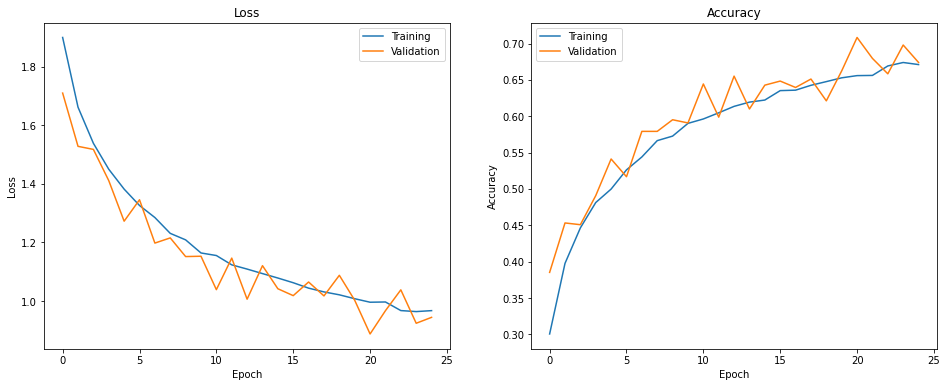

In [18]:
##### YOUR CODE STARTS #####
plot_curves(history)
##### YOUR CODE ENDS ##### 

In [19]:
##### YOUR CODE STARTS #####
# Loss and accuracy on test set
model.evaluate(X_test_norm, to_categorical(y_test))
##### YOUR CODE ENDS ##### 

313/313 [==============================] - 1s 4ms/step - loss: 0.9647 - accuracy: 0.6770


[0.9646813273429871, 0.6769999861717224]

<font color='red'> Textual answer to (**c**) goes here: </font>

<font color="blue"> The accuracy on the test set is almost the same as the accuracy on validation data, so the model doesn't overfit. However, the accuracy got worse compared to the result from the practice session. That might be because zooming into an image removes valuable features around the edges of an image, which causes it to be misclassified. But making the image slightly darker or brighter shouldn't affect the result too much.</font>

# Bonus exercises
*(NB, these are optional exercises!)*
 

## Bonus exercise 1 (2 points):

<font color='red'> Implement basic linear regression and Ridge regression using the closed form solutions (https://stats.stackexchange.com/questions/69205/how-to-derive-the-ridge-regression-solution). Run your implementations on the following synthetic dataset. Compare model coefficients to coefficients produced by `sklearn` functions `LinearRegression` and `Ridge`. Speculate about the difference in coefficients that you observe. </font>

In [20]:
# here we generate a synthetic dataset:
from sklearn.datasets import make_regression

X, y, coefficients = make_regression(
    n_samples=50,
    n_features=4,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)

X.shape

(50, 4)

<font color='red'> Implement closed form solutions for both baseline linear regression and ridge regression (https://stats.stackexchange.com/questions/69205/how-to-derive-the-ridge-regression-solution) on the synthetic dataset: </font>



In [21]:
n, m = X.shape
I = np.identity(m)
lambda_ = 1

##### YOUR CODE STARTS #####

# Implement baseline linear regression (closed form solution)

lr_coef = ...
lr_intercept = ...


# Implement Ridge regression (closed form solution)
lr_ridge_coef = ...
lr_rigde_intercept = ...


##### YOUR CODE ENDS ##### 

In [22]:
from sklearn.linear_model import LinearRegression

# Initialise Linear Regression model from sklearn: 
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [23]:
print(lr.coef_)
print(lr.intercept_)

[86.7933953   0.12444455  0.699363   -1.78601527]
-0.21031847531199954


In [24]:
from sklearn.linear_model import Ridge

lr_ridge = Ridge(lambda_, solver='cholesky')
lr_ridge.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [25]:
print(lr_ridge.coef_)
print(lr_ridge.intercept_)

[84.51986709 -0.59219469  0.22580939 -2.23109663]
0.14955471081851357


<font color='red'>  Compare coefficients you obtained using closed form solution and sklearn implementations. Comment on the difference you observe. </font>



In [26]:
##### YOUR CODE STARTS #####
print(f"Manually calculated W1 = {}, W0 = {}")
print(f"Sklearn implementation W1 = {}, W0 = {}")
##### YOUR CODE ENDS ##### 

SyntaxError: ignored

<font color='red'>Your textual answer explaining the difference between coefficients goes here:</font>

...

## Bonus exercise 2 (up to 4 bonus points depending on presentation):
<font color='red'> Experimentally verify if CutMix augmentation helps to improve the test score on CIFAR10 (not clear, as images are very tiny). Link to the CutMix paper: https://arxiv.org/abs/1905.04899. Show couple of examples of CutMix augmented images and your implementation along with performance curves and scores. Compare the results of CutMix augmented model and the model without data augmentation. </font>


In [ ]:
##### YOUR CODE STARTS #####

##### YOUR CODE ENDS ##### 

In [ ]:
#Comparison part
##### YOUR CODE STARTS #####

##### YOUR CODE ENDS ##### 

<font color='red'> Your explanation: </font>

# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the homework, possibly answering the following questions: 
* how much time did you send on this homework?
* was it too hard/easy for you?
* what would you suggest to add or remove?
* anything else you would like to tell us